In [1]:
pip install pandas scikit-learn matplotlib seaborn

In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/task data set/Instagram data.csv", encoding="latin1")
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [4]:
from sklearn.model_selection import train_test_split

# Drop text columns
df_clean = df.drop(columns=["Caption", "Hashtags"])

# Features and target
X = df_clean.drop(columns=["Follows"])
y = df_clean["Follows"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

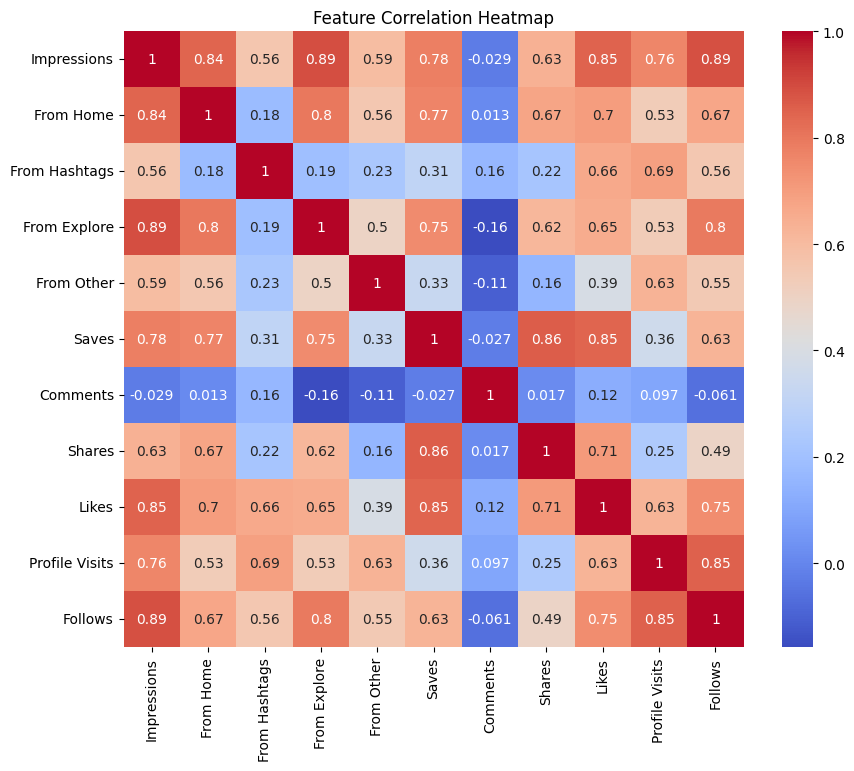

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, rf_pred))

Random Forest R²: 0.8445585351155911


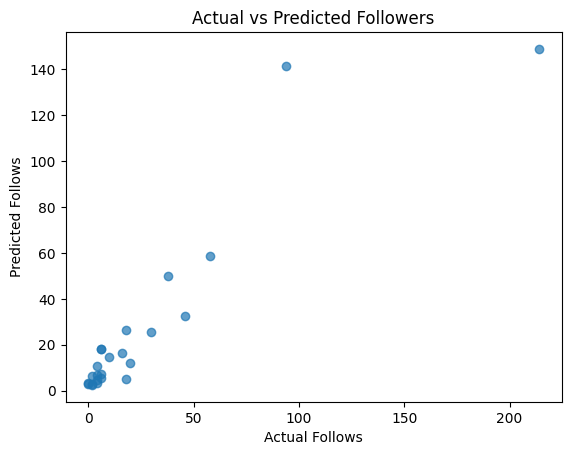

In [10]:
plt.scatter(y_test, rf_pred, alpha=0.7)
plt.xlabel("Actual Follows")
plt.ylabel("Predicted Follows")
plt.title("Actual vs Predicted Followers")
plt.show()